In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt

In [2]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo -qqq
  from torchinfo import summary

In [3]:
# try:
#     from helper_functions import accuracy_fn
#     from going_modular.going_modular import engine, model_builder
# except ImportError:
#     import shutil
#     import os
    
#     try:
#         # Move the required files from the cloned repository to the current directory
#         shutil.move("pytorch-deep-learning/helper_functions.py", "./helper_functions.py")
        
#         # Check if the destination directory already exists
#         if not os.path.exists("./going_modular"):
#             shutil.move("pytorch-deep-learning/going_modular", "./going_modular")
#         else:
#             print("Destination path './going_modular' already exists.")
        
#         # Clean up the cloned repository
#         os.remove("helper_functions.py")
#         shutil.rmtree("going_modular", ignore_errors=True)
#     except FileNotFoundError:
#         print("File not found.")
#     except PermissionError:
#         print("Permission denied.")


In [4]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
from helper_functions import download_data
# Download pizza, steak, sushi images from GitHub
image_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
image_path

[INFO] data\pizza_steak_sushi directory exists, skipping download.


WindowsPath('data/pizza_steak_sushi')

In [6]:
# Setup directory paths to train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir,test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [7]:
from torchvision import transforms
from going_modular.going_modular import data_setup
#from data_setup import create_dataloaders

img_size=224
batch_size=32

#create a transforms
manual_transform=transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor()
])
manual_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
)

In [8]:
train_dataloader,test_dataloader,class_names=data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transform,
    batch_size=batch_size
)
train_dataloader,test_dataloader,class_names

(<torch.utils.data.dataloader.DataLoader at 0x204b027fe20>,
 ['pizza', 'steak', 'sushi'])

# visualize 

In [15]:
images,labels=next(iter(train_dataloader))
len(images),len(labels)
images[0].shape

torch.Size([3, 224, 224])

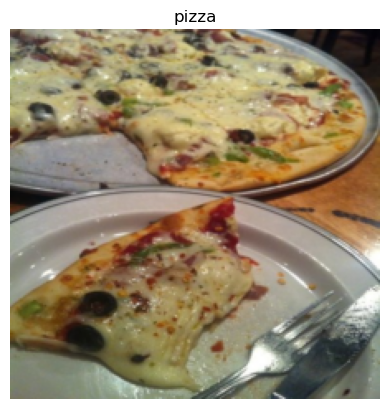

In [16]:
plt.imshow(images[0].permute(1,2,0))
plt.title(class_names[labels[0]])
plt.axis("OFF");